# **D207 - Exploratory Data Analysis** | Performance Assessment
## **Churn Data Set**

### import libraries for hypothesis testing

In [76]:
import pandas as pd
import numpy as np

In [77]:
import matplotlib.pyplot as plt

In [78]:
import seaborn as sns
from scipy import stats

In [86]:
import statsmodels as sm

In [80]:
import plotnine as p9

In [81]:
import math as ma

### import cleaned churn data set with these columns/variables:
- Churn
- Contract
- Tenure
- MonthlyCharge

In [87]:
df = pd.read_csv('datasets/churn_clean.csv', usecols=["Churn", "Contract", "Tenure", "MonthlyCharge"])
df.head()

,Churn,Contract,Tenure,MonthlyCharge
0,No,One year,6.795513,172.455519
1,Yes,Month-to-month,1.156681,242.632554
2,No,Two Year,15.754144,159.947583
3,No,Two Year,17.087227,119.956840
4,Yes,Month-to-month,1.670972,149.948316


### obtain preliminary info about the data set:

In [88]:
df.shape

(10000, 4)

In [89]:
df.dtypes

Churn             object
Contract          object
Tenure           float64
MonthlyCharge    float64
dtype: object

In [90]:
#continuous variables: Tenure and Montly Charge
df.describe()


,Tenure,MonthlyCharge
count,10000.000000,10000.000000
mean,34.526188,172.624816
std,26.443063,42.943094
min,1.000259,79.978860
25%,7.917694,139.979239
50%,35.430507,167.484700
75%,61.479795,200.734725
max,71.999280,290.160419


In [91]:
#categorical variables: Churn, Contract
df.describe(include=object)

,Churn,Contract
count,10000,10000
unique,2,3
top,No,Month-to-month
freq,7350,5456


# **2 sample t-test**

In [92]:
#create dataframe where customers churn
df_yes = df[df.Churn == 'Yes']
df_yes.head()

,Churn,Contract,Tenure,MonthlyCharge
1,Yes,Month-to-month,1.156681,242.632554
4,Yes,Month-to-month,1.670972,149.948316
6,Yes,Month-to-month,13.236774,200.118516
7,Yes,Month-to-month,4.264255,114.950905
14,Yes,Month-to-month,10.060199,159.965581


In [93]:
#create a dataframe where customers do not churn
df_no = df[df.Churn == 'No']
df_no.head()

,Churn,Contract,Tenure,MonthlyCharge
0,No,One year,6.795513,172.455519
2,No,Two Year,15.754144,159.947583
3,No,Two Year,17.087227,119.956840
5,No,One year,7.000994,185.007692
8,No,Month-to-month,8.220686,117.468591


In [94]:
df_yes['MonthlyCharge'].mean()

199.29517509886793

In [95]:
df_no['MonthlyCharge'].mean()

163.00897252612248

In [96]:
#summary stats
df_yes['MonthlyCharge'].describe()

count    2650.000000
mean      199.295175
std        41.268191
min        92.455140
25%       167.484705
50%       200.118500
75%       232.641455
max       290.160419
Name: MonthlyCharge, dtype: float64

In [97]:
df_no['MonthlyCharge'].describe()

count    7350.000000
mean      163.008973
std        39.322148
min        79.978860
25%       137.439154
50%       159.964200
75%       184.978458
max       290.160400
Name: MonthlyCharge, dtype: float64

### RQ: is the mean monthly charge significantly different for customers who churn than for customers who don't?
- null hypothesis: means are equal
- alternative hypothesis: means are not equal

## **CALCULATE T-STATISTIC**
- alpha = 0.05

In [98]:
y_churn = df_yes['MonthlyCharge']
n_churn = df_no['MonthlyCharge']

In [99]:
stats.ttest_ind(y_churn, n_churn, equal_var=False)

Ttest_indResult(statistic=39.28778644007045, pvalue=1.7823941678632952e-290)

In [100]:
# since p < alpha, we reject the null hypothesis

## **Q-Q Plot - check if data are Normally distributed**

In [102]:
tq_y = stats.probplot(y_churn, dist='norm')
tq_n = stats.probplot(n_churn, dist='norm')

In [109]:
df1 = pd.DataFrame(data = {'Theoretical Quantiles': tq_y[0][0],
                           "Ordered Values": df_yes.MonthlyCharge.sort_values() })


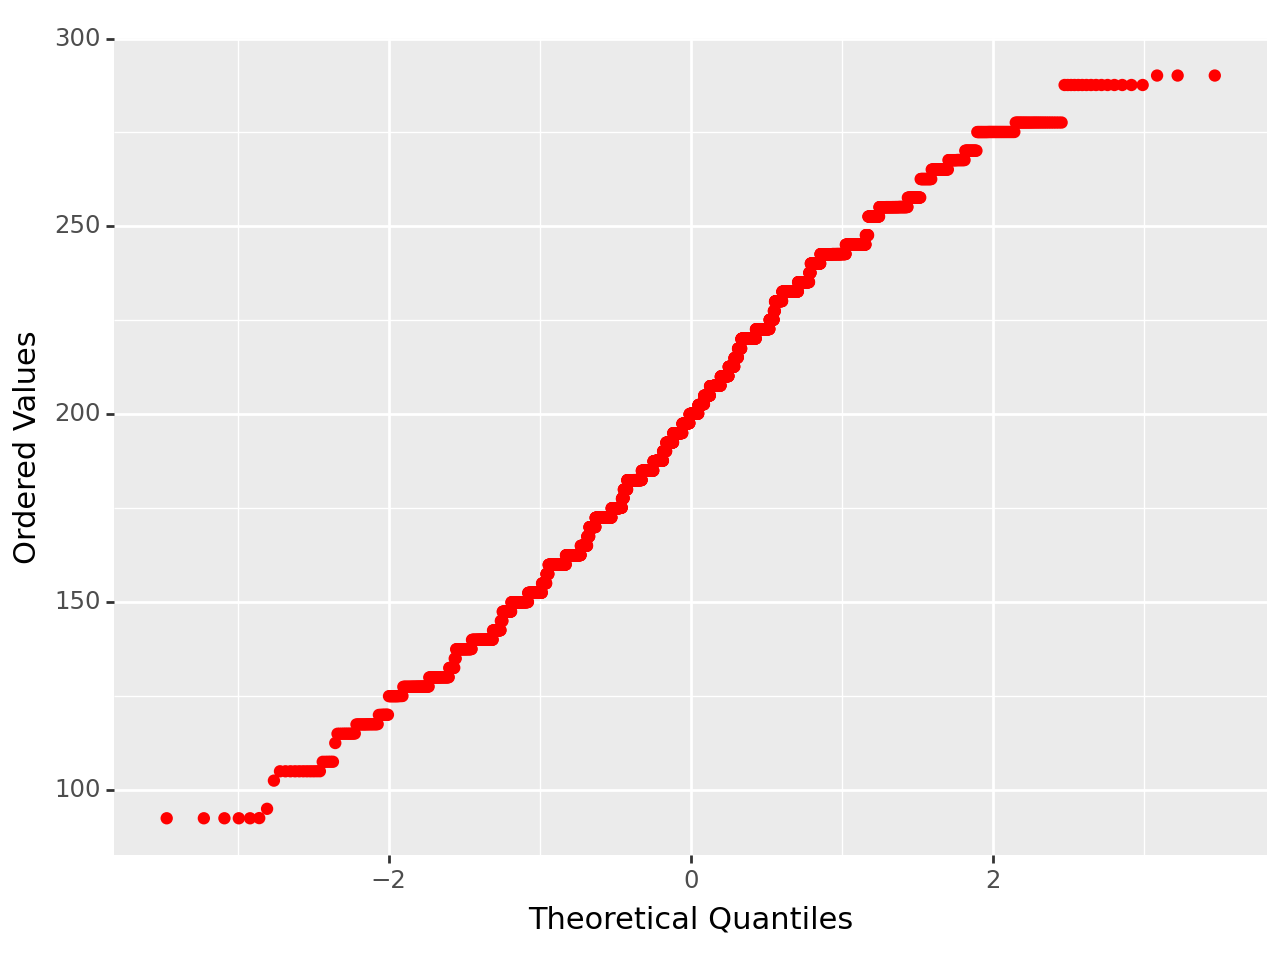

In [136]:
print(p9.ggplot(df1)+ p9.aes('Theoretical Quantiles', "Ordered Values")+ p9.geom_point(color='red'))

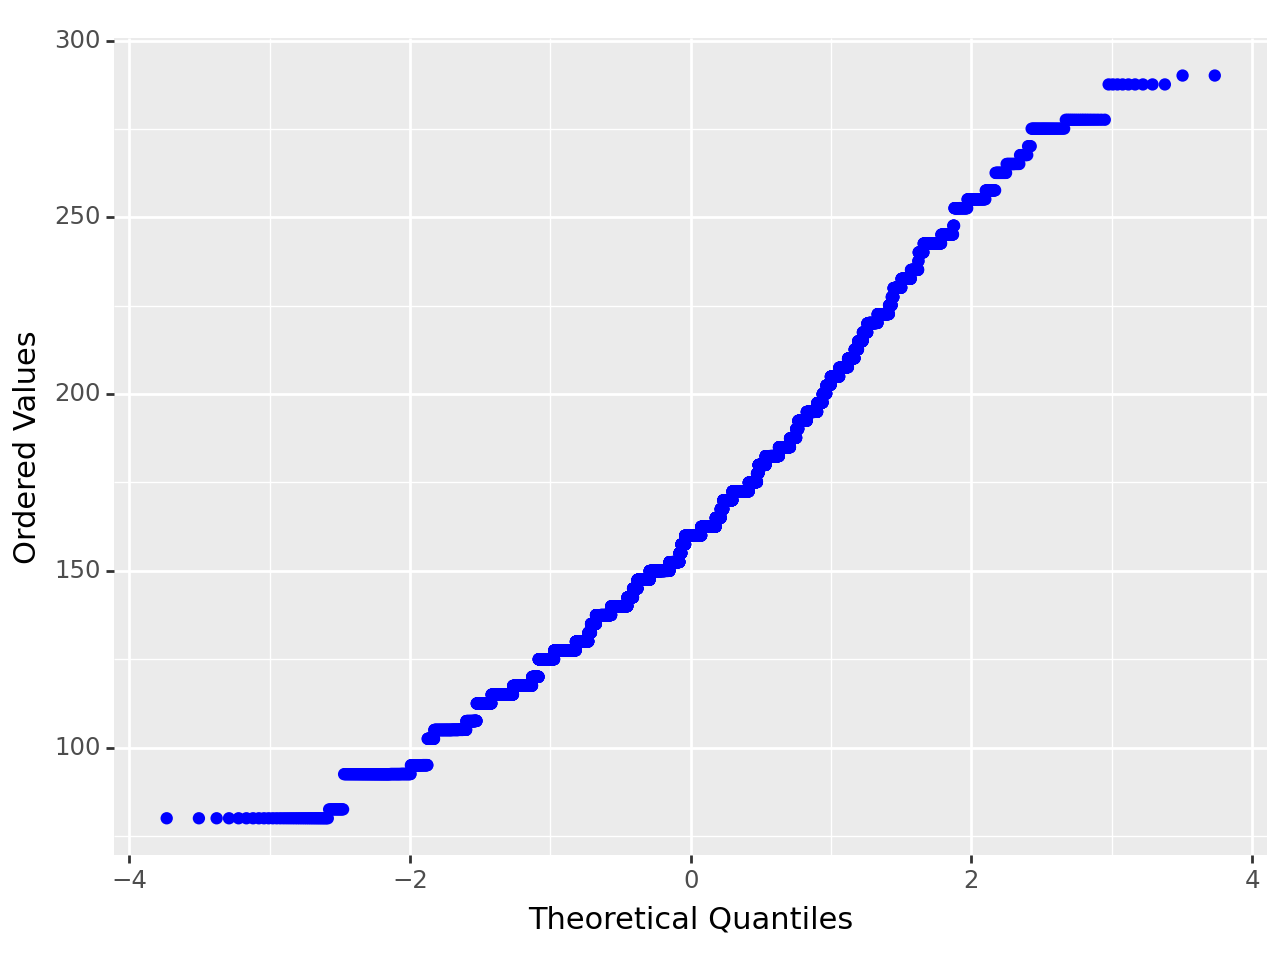

In [137]:
df2 = pd.DataFrame(data = {'Theoretical Quantiles': tq_n[0][0],
                           "Ordered Values": df_no.MonthlyCharge.sort_values() })
print(p9.ggplot(df2)+ p9.aes('Theoretical Quantiles', "Ordered Values")+ p9.geom_point(color='blue'))

In [103]:
shapiro = stats.shapiro(df_yes.MonthlyCharge)
print(shapiro)

ShapiroResult(statistic=0.9855512380599976, pvalue=8.825010225524757e-16)


In [104]:
shapiro = stats.shapiro(df_no.MonthlyCharge)
print(shapiro)

ShapiroResult(statistic=0.976692259311676, pvalue=5.42239270784402e-33)


C:\Users\kaili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.


In [105]:
#data are not Normally distributed, but the sample sizes are large.

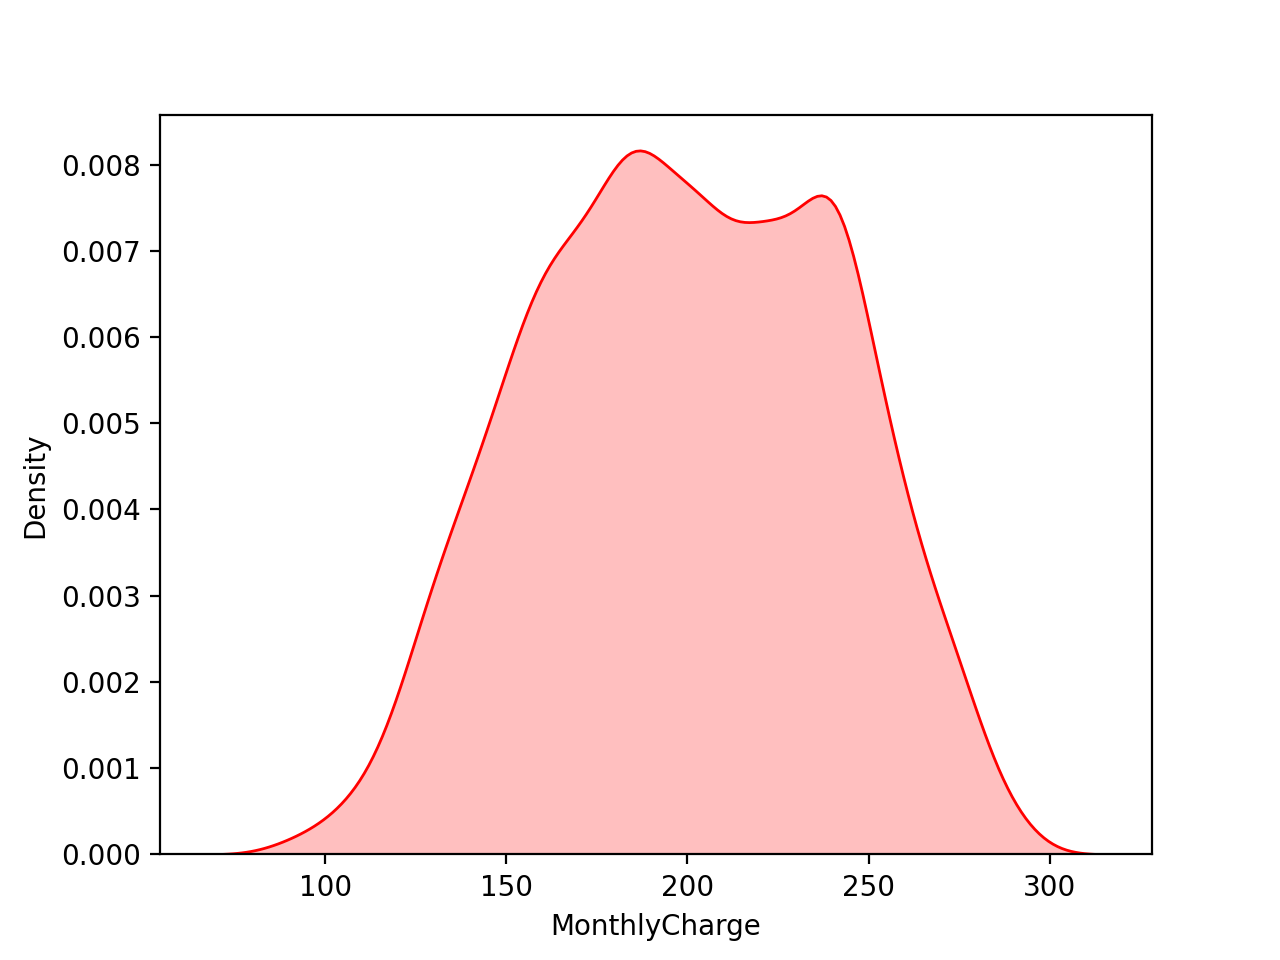

In [141]:
sns.kdeplot(df_yes['MonthlyCharge'], fill=True, color='red')
plt.show()

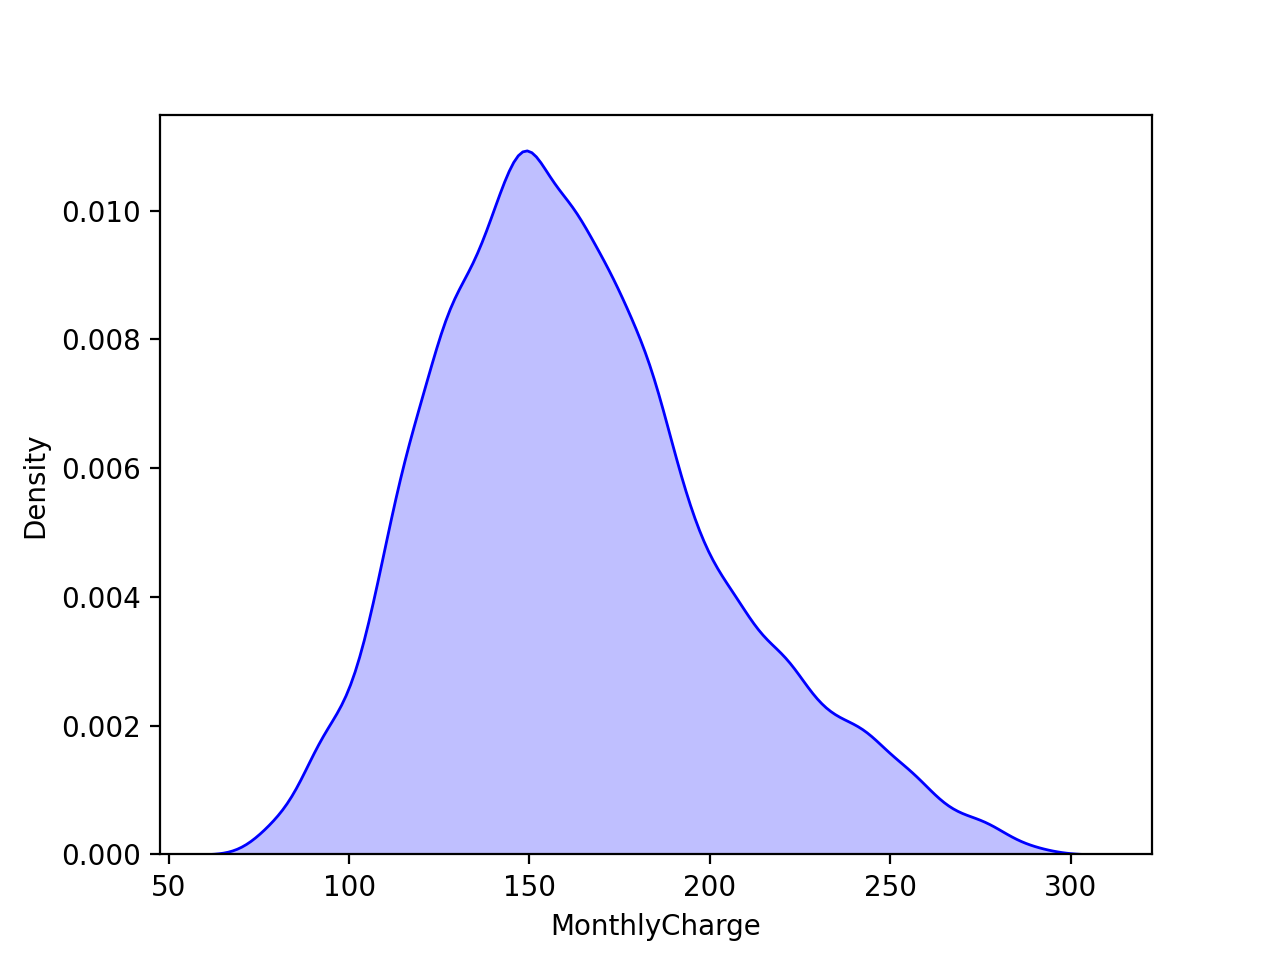

In [142]:
sns.kdeplot(df_no['MonthlyCharge'], fill=True, color='blue')
plt.show()

# **UNIVARIATE STATS**

### Continuous Variables: Tenure & Monthly Charge

In [143]:
df.describe()

,Tenure,MonthlyCharge
count,10000.000000,10000.000000
mean,34.526188,172.624816
std,26.443063,42.943094
min,1.000259,79.978860
25%,7.917694,139.979239
50%,35.430507,167.484700
75%,61.479795,200.734725
max,71.999280,290.160419


In [145]:
sns.__version__

'0.12.2'

In [148]:
df.isna().sum()

Churn            0
Contract         0
Tenure           0
MonthlyCharge    0
dtype: int64

In [149]:
sns.set_style('darkgrid')

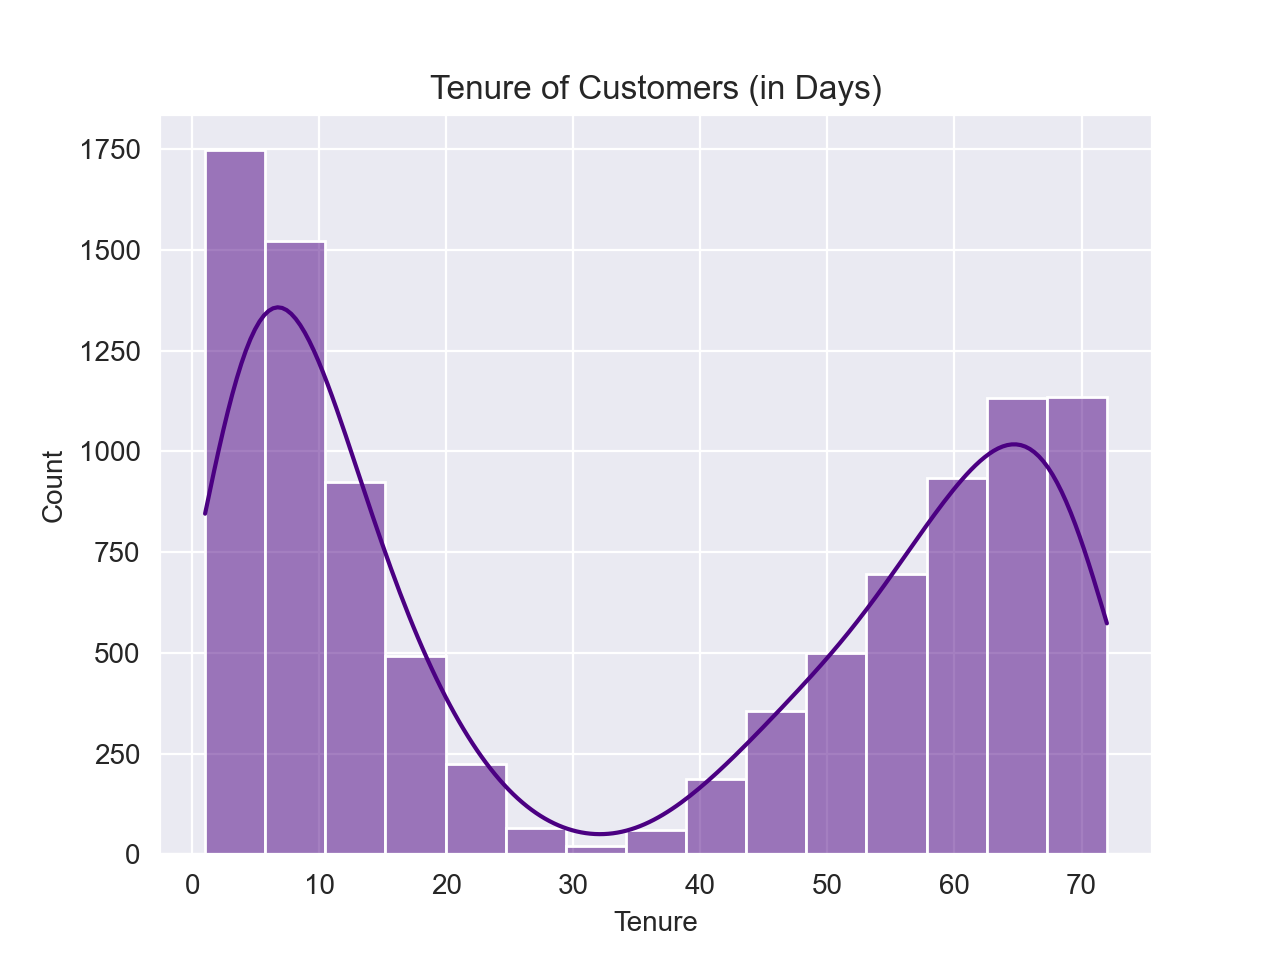

In [159]:
sns.histplot(df.Tenure, kde=True, color='indigo').set(title='Tenure of Customers (in Days)')
plt.show()

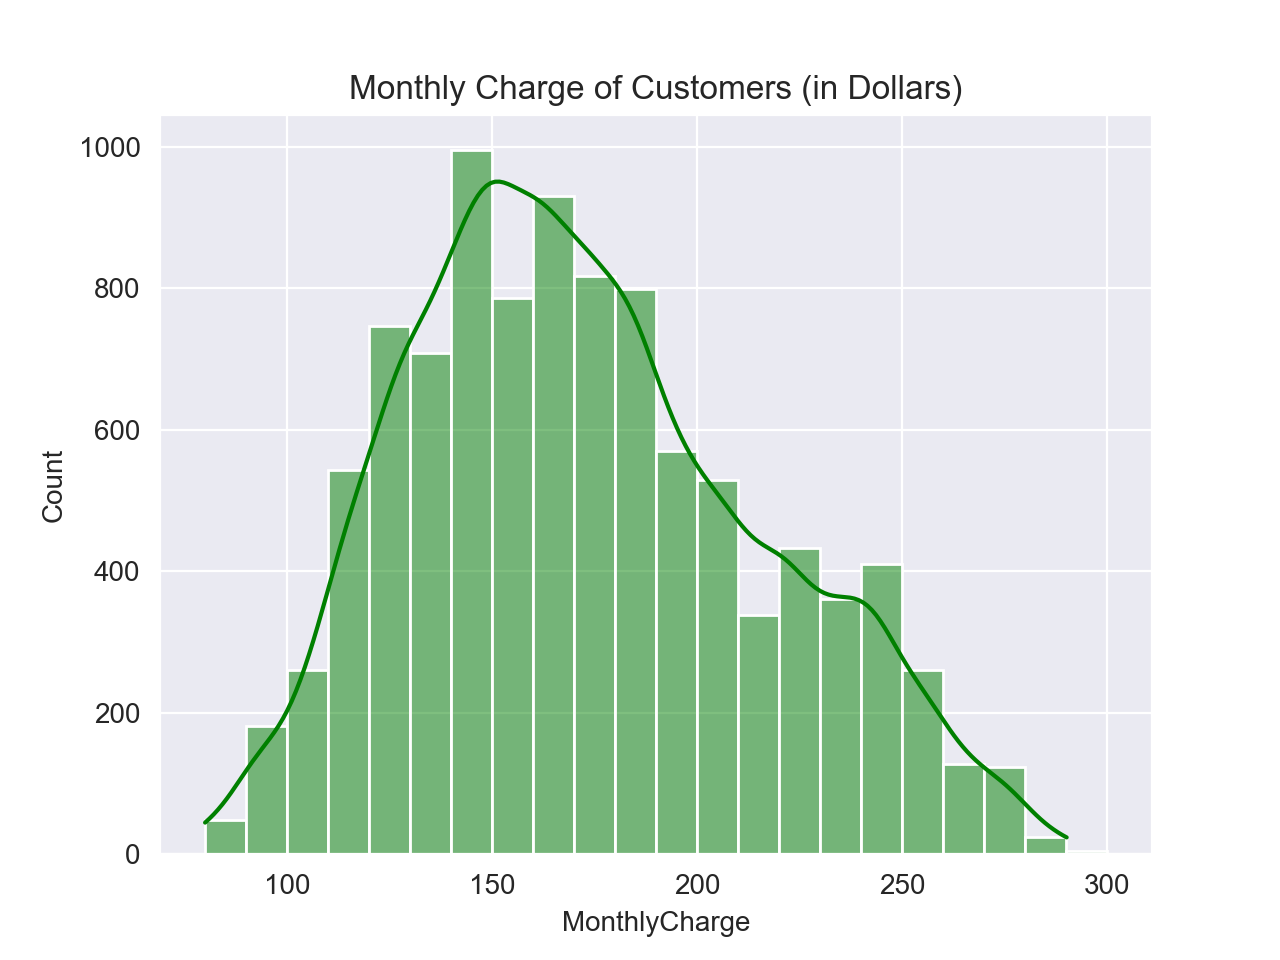

In [162]:
sns.histplot(df.MonthlyCharge, kde=True, color='green', binwidth=10).set(title='Monthly Charge of Customers (in Dollars)')
plt.show()

### Categorical Variables: Churn, Contract

In [163]:
df.describe(include=object)

,Churn,Contract
count,10000,10000
unique,2,3
top,No,Month-to-month
freq,7350,5456


In [165]:
df['Churn'].value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

In [166]:
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [167]:
from matplotlib import pyplot as plt

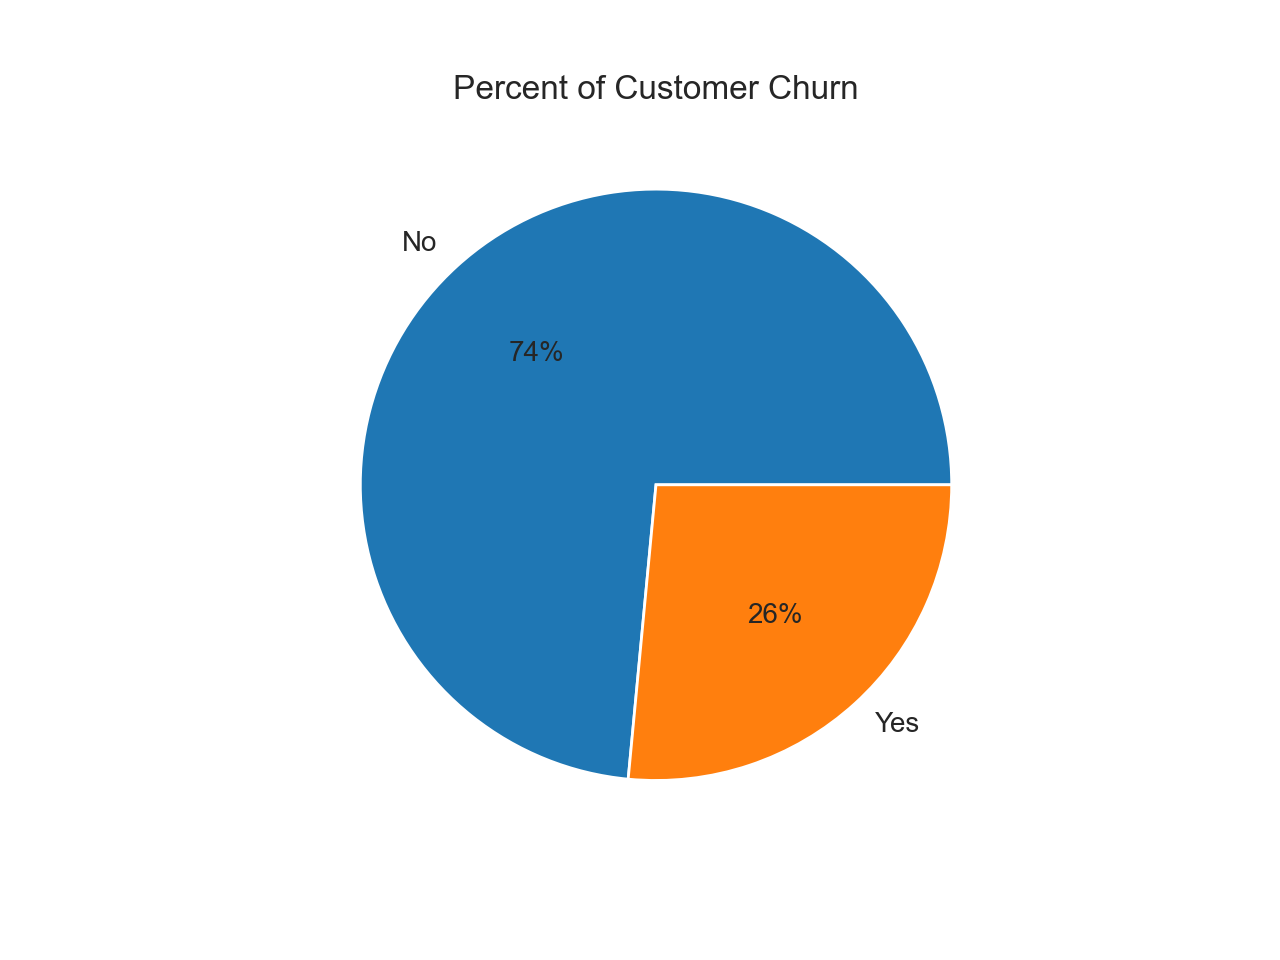

In [191]:
data = [7350, 2650]
keys = ['No', 'Yes']
plt.pie(data, labels=keys, autopct='%.0f%%')
plt.title('Percent of Customer Churn')
plt.show()

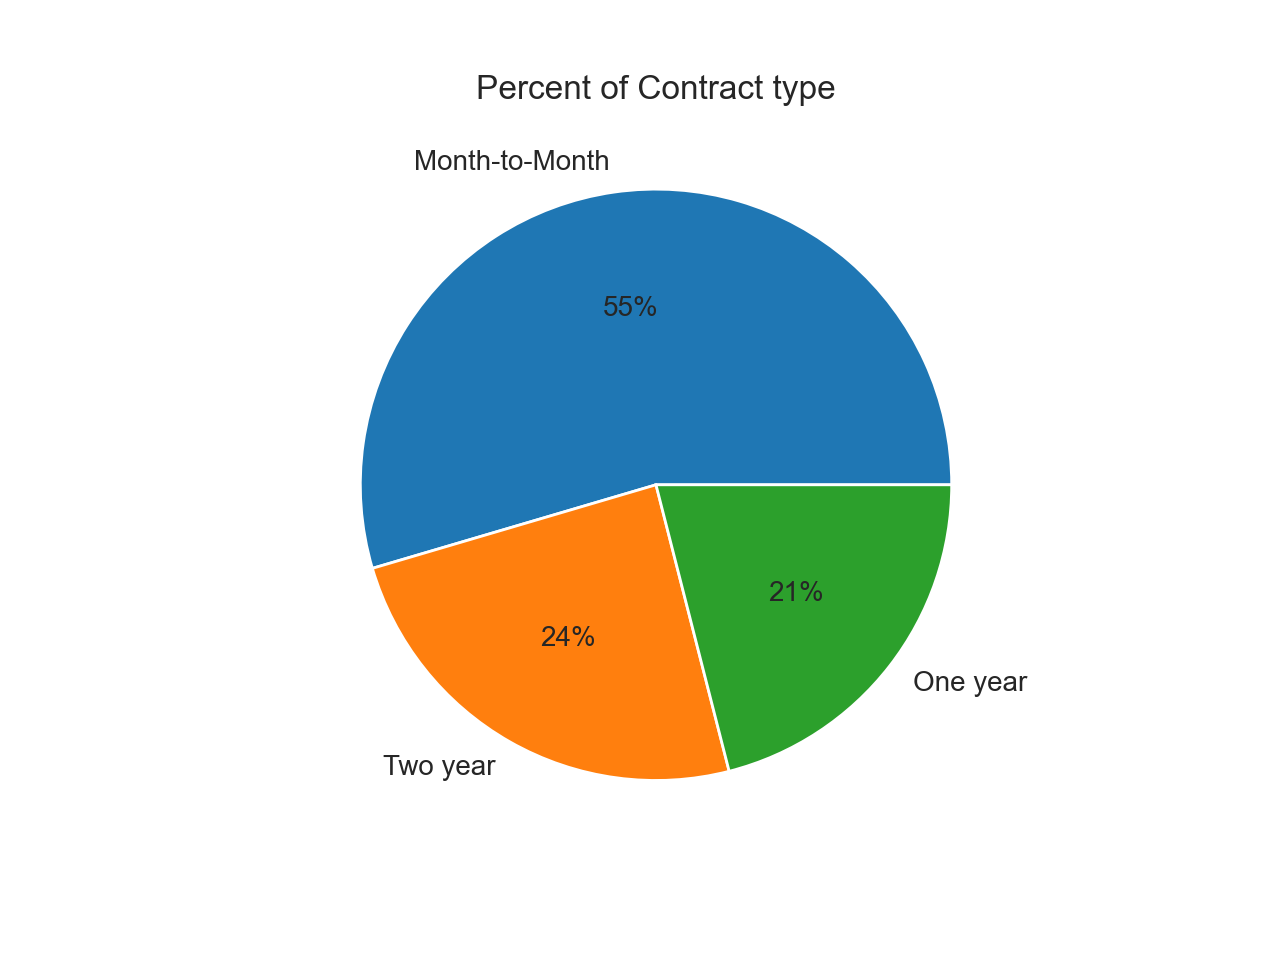

In [196]:
data2 = [5456, 2442, 2102]
keys2 = ['Month-to-Month', 'Two year', 'One year']
plt.pie(data2, labels=keys2, autopct='%.0f%%')
plt.title('Percent of Contract type')
plt.show()

# **BIVARIATE STATISTICS**
- monthly charge vs. Tenure (continuous)
- contract vs churn

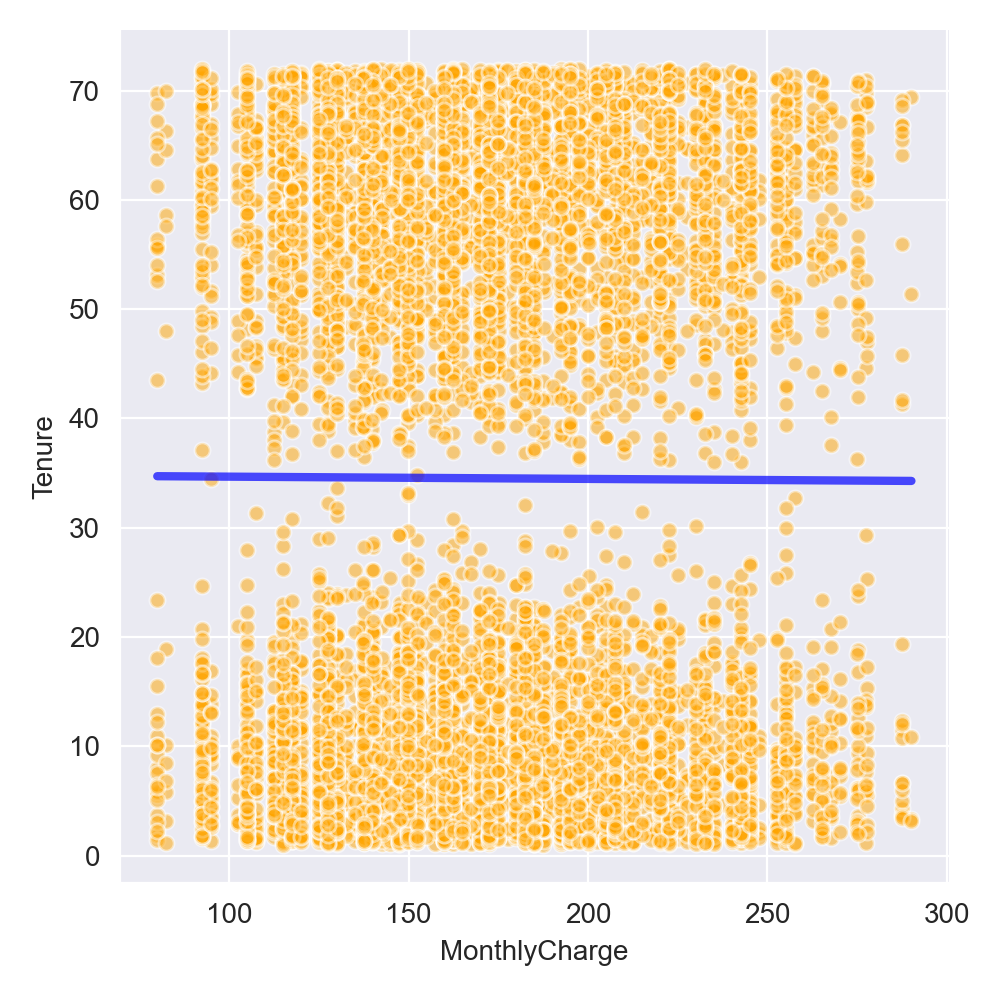

In [222]:
sns.lmplot(x='MonthlyCharge', y='Tenure', data=df, ci=False,
          scatter_kws=dict(alpha=0.5, s=30, color='orange', edgecolors='white'), 
           line_kws=dict(alpha=0.7, color='blue', linewidth=3)
          )
plt.show()

In [219]:
r = df['MonthlyCharge'].corr(df['Tenure'])
print(r)

-0.003336810413451893


In [220]:
var = df['MonthlyCharge'].corr(df['Tenure'])**2
print(var)

1.1134303735320993e-05


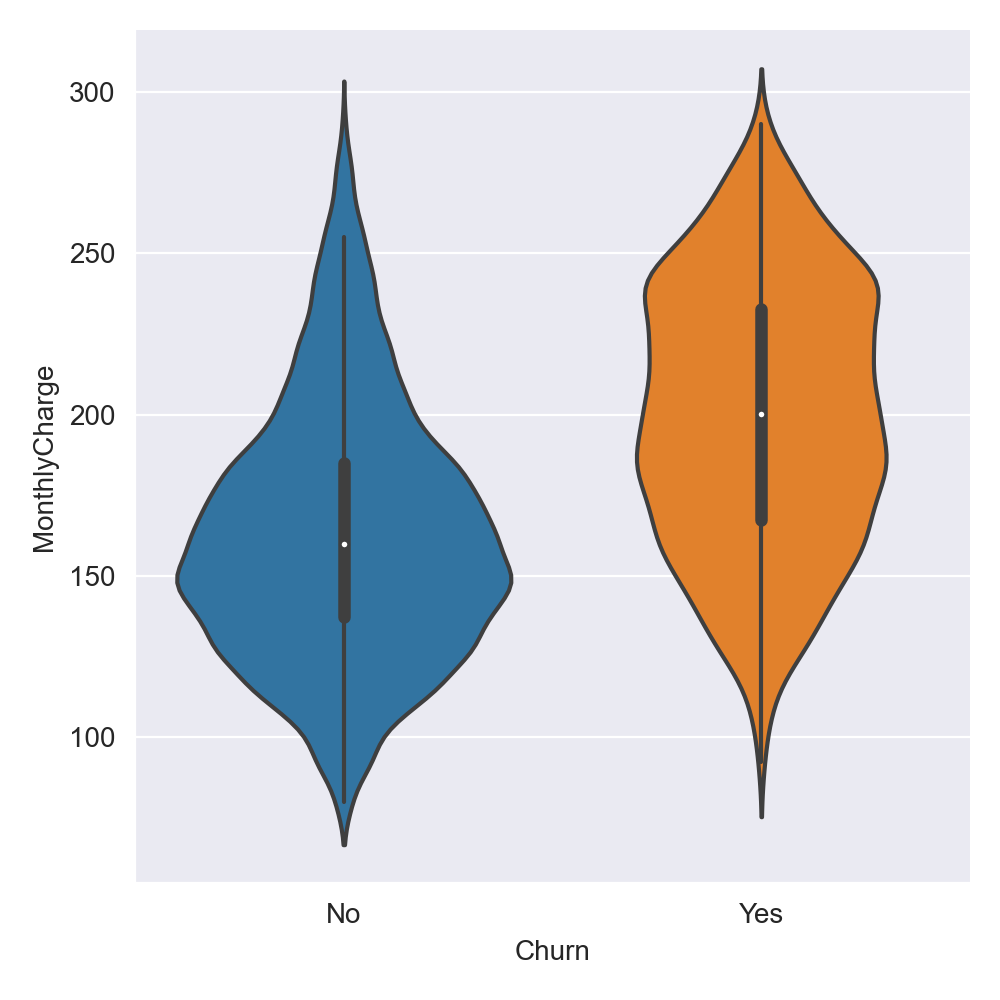

In [244]:
sns.catplot(x='Churn', y='MonthlyCharge', data=df, kind='violin')
plt.show()

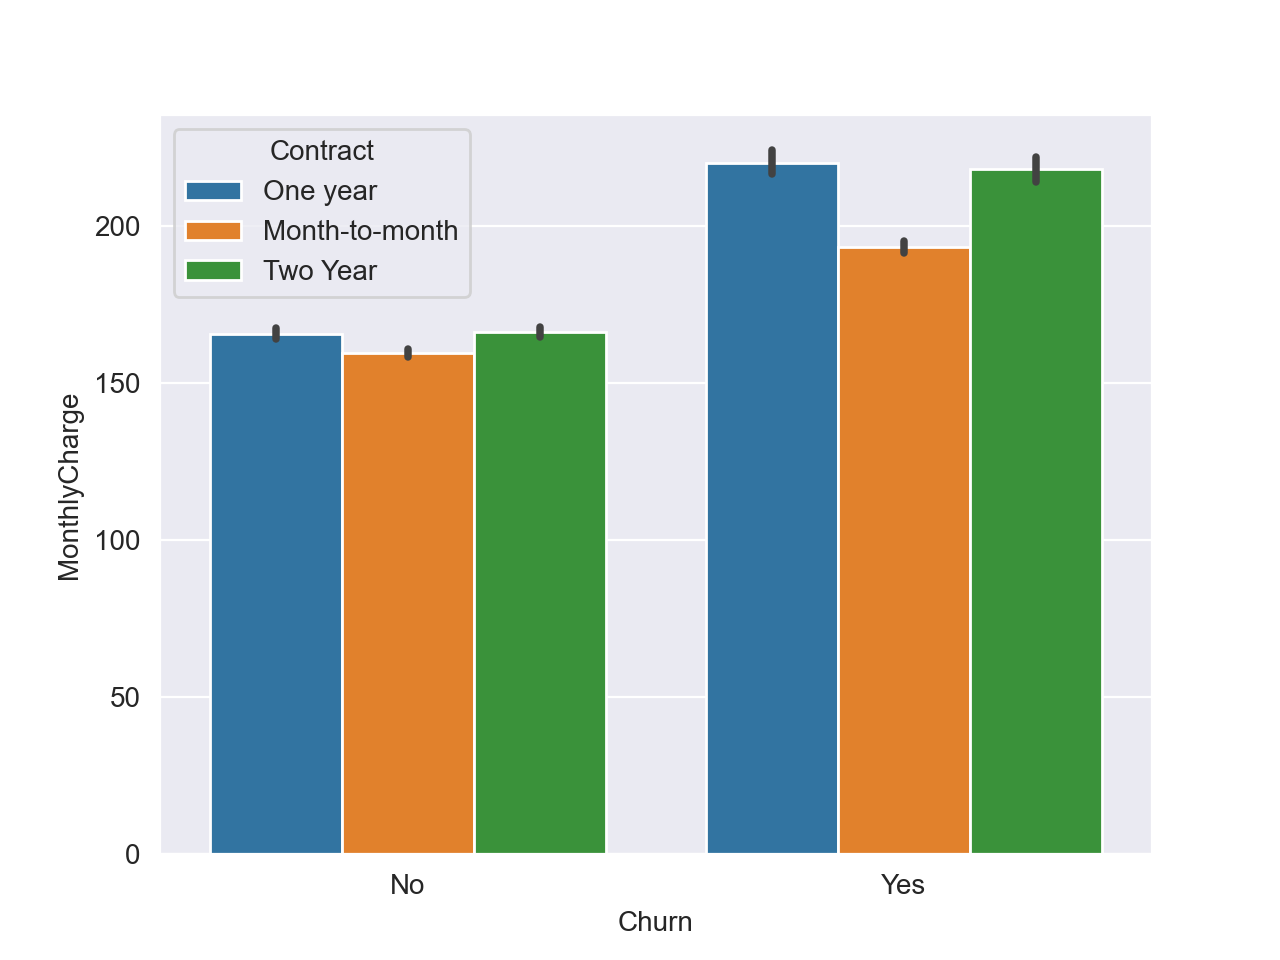

In [242]:
sns.barplot(x='Churn', y='MonthlyCharge', data=df,
           hue='Contract')
plt.show()

In [282]:
df = df.drop(columns='index')
df.head()

,Churn,Contract,Tenure,MonthlyCharge
0,No,One year,6.795513,172.455519
1,Yes,Month-to-month,1.156681,242.632554
2,No,Two Year,15.754144,159.947583
3,No,Two Year,17.087227,119.956840
4,Yes,Month-to-month,1.670972,149.948316


In [285]:
df['Contract'].groupby(df['Churn']).value_counts()  #counts

Churn  Contract      
No     Month-to-month    3422
       Two Year          2133
       One year          1795
Yes    Month-to-month    2034
       Two Year           309
       One year           307
Name: count, dtype: int64

In [286]:
df['Contract'].groupby(df['Churn']).value_counts() / 10000  #percents

Churn  Contract      
No     Month-to-month    0.3422
       Two Year          0.2133
       One year          0.1795
Yes    Month-to-month    0.2034
       Two Year          0.0309
       One year          0.0307
Name: count, dtype: float64

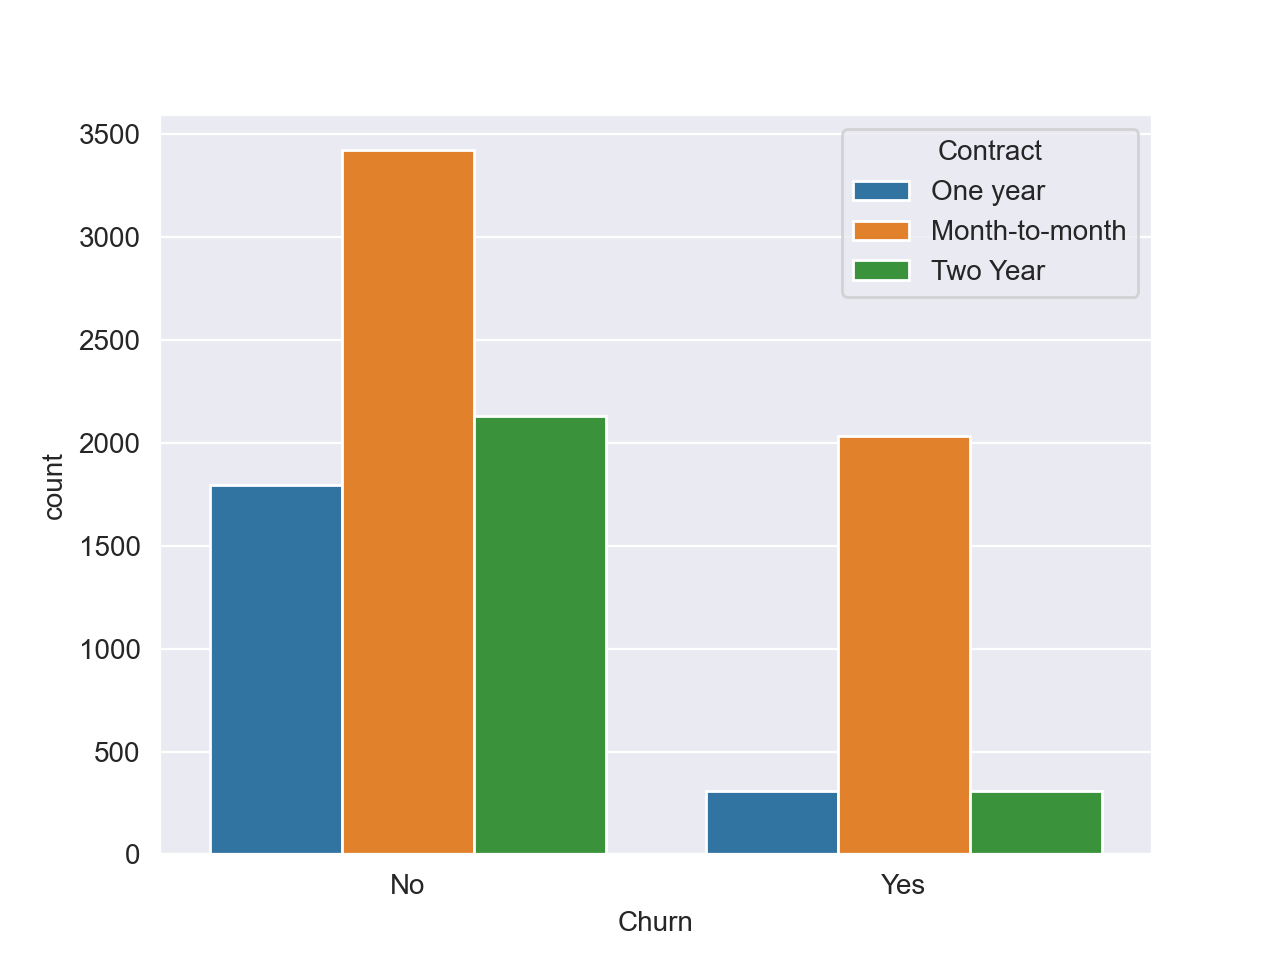

In [295]:
sns.countplot(x='Churn', data=df, hue='Contract',
          )
plt.show()